In [1]:
%matplotlib inline
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize,least_squares

In [2]:
# Parameters
v0=8.0
nwind = 33
wind=np.arange(254,287)
#b=np.array((1,5,1000))
b=np.array(( 1.40002561e-01,   8.51478121e+00,   2.62606729e+03))

In [3]:
#Simple Attenuation fn
def att(dist, ang, b):
    # angular part
    angular=np.where(b[1]*np.abs(ang)<np.pi/2.,np.square(np.cos(b[1]*ang)),0.)
    #radial
    radial=np.exp(-dist*b[2])
    return 1.0-b[0]*angular*radial

In [4]:
#Loading the wind velocities for each wind turbine and each angle from CFD data
v=np.loadtxt('hornsrev_data_all.txt')
vxref=v[:,3]
vyref=v[:,4]
angles=v[:,0]
#Calculating the mean wind velocities from x and y coordinates
vmean=np.sqrt(np.square(vxref)+np.square(vyref))
vmean=pd.DataFrame(vmean)
vref=pd.DataFrame()
vmean['angle']=angles
vref=vref.append(vmean)
#Seperating the wind speed appropriate to the wind angles
vref=vref.groupby('angle')
vref.groups
vref.describe()
#vref.get_group(260).iat[50,0]
#vref.iat[5,0]
#vref.groupby('angle')


0                                                              \
      count      mean       std       min       25%       50%       75%   
angle                                                                     
254.0  80.0  6.910797  0.552957  6.091574  6.333425  6.799064  7.520512   
255.0  80.0  6.920400  0.578981  6.034241  6.374163  6.714945  7.509508   
256.0  80.0  6.943027  0.584811  6.009457  6.414664  6.760189  7.575892   
257.0  80.0  6.955434  0.561776  6.001682  6.496962  6.933843  7.502024   
258.0  80.0  7.025873  0.569945  6.096195  6.480574  7.148098  7.556709   
259.0  80.0  7.027561  0.574868  5.987300  6.425509  7.347072  7.536211   
260.0  80.0  7.061768  0.575641  5.937007  6.450896  7.348988  7.579115   
261.0  80.0  7.111549  0.589206  5.845730  6.594202  7.358127  7.584109   
262.0  80.0  7.085957  0.542486  5.873750  6.567454  7.248175  7.488041   
263.0  80.0  7.015972  0.490996  5.779750  6.725670  7.170199  7.356674   
264.0  80.0  6.926263  0.414479  5.927886  6.693292  6.959036  7.155771   
265.0  80.0  6.599728  0.451146  5.873790  6.341810  6.481742  6.714096   
266.0  80.0  6.214523  0.571165  5.432371  5.888884  6.061552  6.240751   
267.0  80.0  5.895463  0.690132  5.101769  5.562526  5.721152  5.846079   
268.0  80.0  5.633787  0.790331  5.014886  5.308221  5.410282  5.511532   
269.0  80.0  5.386172  0.872698  4.785307  5.013230  5.110214  5.260523   
270.0  80.0  5.345943  0.919662  4.806545  4.932399  5.053335  5.216129   
271.0  80.0  5.409433  0.888238  4.811034  5.027968  5.127094  5.282139   
272.0  80.0  5.652316  0.799387  5.126558  5.317719  5.397676  5.507735   
273.0  80.0  5.926958  0.690397  5.423450  5.646832  5.716036  5.829067   
274.0  80.0  6.241984  0.567488  5.825229  5.955014  6.058582  6.194616   
275.0  80.0  6.613565  0.447571  6.017153  6.393831  6.486375  6.635537   
276.0  80.0  6.931409  0.402825  5.957682  6.808014  6.904163  7.085873   
277.0  80.0  7.052528  0.484049  5.900356  6.809732  7.229930  7.343776   
278.0  80.0  7.058251  0.513812  5.976482  6.642416  7.264419  7.427949   
279.0  80.0  7.084585  0.559461  6.006661  6.559816  7.291476  7.468034   
280.0  80.0  7.031356  0.581241  6.018917  6.399436  7.281046  7.454751   
281.0  80.0  6.973774  0.569186  5.965303  6.399216  7.189892  7.509168   
282.0  80.0  6.954898  0.567108  5.839279  6.451552  7.005049  7.528311   
283.0  80.0  6.901499  0.613259  5.893866  6.348711  6.694578  7.469147   
284.0  80.0  6.908291  0.618342  5.910596  6.395876  6.726938  7.459795   
285.0  80.0  6.864659  0.611239  5.934187  6.416956  6.624939  7.415473   
286.0  80.0  6.817628  0.611620  5.902346  6.343503  6.631879  7.359137   

                 
            max  
angle            
254.0  7.772696  
255.0  7.649463  
256.0  7.720793  
257.0  7.677964  
258.0  7.802553  
259.0  7.844071  
260.0  7.880491  
261.0  7.981087  
262.0  7.976683  
263.0  7.925102  
264.0  7.968590  
265.0  8.057062  
266.0  8.112610  
267.0  8.186733  
268.0  8.228583  
269.0  8.240426  
270.0  8.253331  
271.0  8.296240  
272.0  8.265701  
273.0  8.208609  
274.0  8.141377  
275.0  8.145417  
276.0  8.022710  
277.0  7.914984  
278.0  7.908316  
279.0  7.966422  
280.0  7.966826  
281.0  7.819626  
282.0  7.784380  
283.0  7.799610  
284.0  7.782868  
285.0  7.805713  
286.0  7.787384

In [5]:
#Loading the coordinates of each wind turbine 
coords_in = np.loadtxt('coords.txt')
#Calculating the min points of the wind turbines
xmin = min(coords_in[:,0])
ymin = min(coords_in[:,1])
#Finding a central point for whole wind farm
xzero = (max(coords_in[:,0])-xmin)/2
yzero = (max(coords_in[:,1])-ymin)/2
#print(xzero, yzero)
#Putting wind turbines appropriate to the new centre point
coords_x=coords_in[:,0]-xzero-xmin
coords_y=coords_in[:,1]-yzero-ymin
coords=[coords_x,coords_y]
coords=np.array(coords).T
nturb=np.shape(coords)[0]
#plt.scatter(coords[:,0], coords[:,1])

#Arrays for pairwise distances and angles
#Angle 0: x direction. Angle pi/2: y direction
distance=np.zeros((nturb,nturb))
angle=np.zeros((nturb,nturb))
for i in range(0,nturb):
    distance[i,:]=np.sqrt(np.square(coords[i,0]-coords[:,0])+np.square(coords[i,1]-coords[:,1]))
    angle[i,:]=np.arctan2(coords[:,1]-coords[i,1],coords[:,0]-coords[i,0])
#Rotate angles so that north=0 and convert to degrees
angle=-np.rad2deg(angle)+270
angle[0,1]

#Rotating angles to wind direction
windangle=5 #degrees
rotangles=np.mod(angle-windangle+180,360)-180

(np.sort(distance))[0,2]

561.11050605027879

In [6]:
i=0
j=8
print('Turbine {} x {} y {}'.format(i,coords[i,0],coords[i,1]))
print('Turbine {} x {} y {}'.format(j,coords[j,0],coords[j,1]))
print('{}-{} dist {} angle {}'.format(i,j,distance[i,j], angle[i,j]))

Turbine 0 x -2728.5 y 1952.0
Turbine 8 x -2168.5 y 1952.0
0-8 dist 560.0 angle 270.0


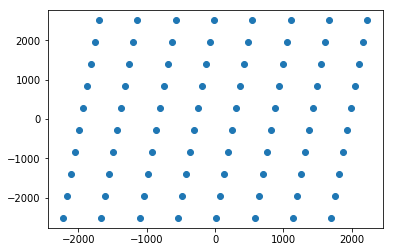

In [7]:
def rotate(angle,coords):
    angle = np.pi*angle/180.
    rotcoordx = []
    rotcoordy = []
    for coord in coords:
        rotcoordx+=[coord[0]*np.cos(angle)-coord[1]*np.sin(angle)]
        rotcoordy+=[coord[0]*np.sin(angle)+coord[1]*np.cos(angle)]
    rotcoords=[rotcoordx,rotcoordy]
    rotcoords=np.array(rotcoords).T   
    return rotcoords 
#print rotate(254,coords)[:,0]
plt.scatter(rotate(264,coords)[:,0],rotate(264,coords)[:,1])

In [8]:
#Total att
def deviation(b):
    total_att=np.ones((nturb,nwind))
    deviation=0
    for k in range(0,nwind):
        for j in range(0,nturb):
            for i in range(0,nturb):
                if (i!=j):
                    total_att[j,k] = total_att[j,k]*att(distance[i,j],np.mod(np.deg2rad(angle[i,j]-wind[k])+np.pi,np.pi*2)-np.pi,b)
 #           print('{0} {1} {2}'.format(j,wind[k],total_att[j,k]))
            deviation=deviation+np.square(vref.get_group(wind[k]).iat[j,0]-v0*total_att[j,k])
    return deviation

In [9]:
#Total att
def deviation_sq(b):
    total_att=np.ones((nturb,nwind))
    dev_vec=np.zeros((nturb*nwind))
    for k in range(0,nwind):
        for j in range(0,nturb):
            for i in range(0,nturb):
                if (i!=j):
                    total_att[j,k] = total_att[j,k]*att(distance[i,j],np.mod(np.deg2rad(angle[i,j]-wind[k])+np.pi,np.pi*2)-np.pi,b)
 #           print('{0} {1} {2}'.format(j,wind[k],total_att[j,k]))
            dev_vec[nturb*k+j]=(vref.get_group(wind[k]).iat[j,0]-v0*total_att[j,k])
    return dev_vec

[[ 1.          1.          1.         ...,  1.          1.          0.85999744]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 0.85999744  1.          1.         ...,  1.          1.          1.        ]]


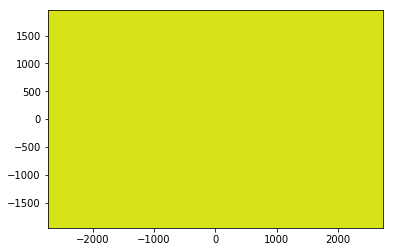

In [10]:
#Plot attenuation
xsamp = np.linspace(min(coords_x), max(coords_x), 200)
ysamp = np.linspace(min(coords_y), max(coords_y), 200)

x,y = np.meshgrid(xsamp,ysamp)
distances=np.empty_like(x)
angles=np.empty_like(x)
values=np.empty_like(x)
values=1.0

for j in range(0,nturb):
    distances=np.sqrt(np.square(coords[j,0]-x)+np.square(coords[j,1]-y))
    angles=np.arctan2(y-coords[j,1],x-coords[j,0])+0/180*np.pi
    values = values*att(distances,angles,b) #np.mod(angles-wind[k]+np.pi,np.pi*2)-np.pi,b)

print(values)

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots()
ax.contourf(x, y, values)

plt.show()

In [11]:
#Unconstrained minimisation
res=minimize(deviation,b)


In [12]:
#Least squares minimisation
lsq=least_squares(deviation_sq,b,method='lm')

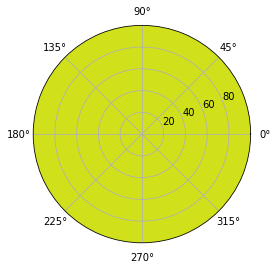

In [13]:
azimuths = np.radians(np.linspace(-180, 180, 360))
zeniths = np.arange(0, 100, .1)

r, theta = np.meshgrid(zeniths, azimuths)
values = att(r,theta,b)

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values)

plt.show()

In [14]:
lsq

 active_mask: array([0, 0, 0])
        cost: 3436.4986591022289
         fun: array([-0.43111623, -0.23196619, -0.46045137, ..., -1.86826339,
       -2.03239328, -2.0373401 ])
        grad: array([ 0.,  0.,  0.])
         jac: array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 4
        njev: None
  optimality: 0.0
      status: 1
     success: True
           x: array([  1.40002561e-01,   8.51478121e+00,   2.62606729e+03])

In [15]:
b

array([  1.40002561e-01,   8.51478121e+00,   2.62606729e+03])

In [16]:
res=np.reshape(lsq.fun,(nwind,nturb))

In [18]:
print (res)

[[-0.43111623 -0.23196619 -0.46045137 ..., -1.81285309 -1.67349158
  -0.68489314]
 [-0.42325345 -0.38578134 -0.41003802 ..., -1.91368598 -1.75737998
  -0.53253668]
 [-0.40459057 -0.34337667 -0.42120008 ..., -1.78459079 -1.88957085
  -0.53868485]
 ..., 
 [-0.23622915 -0.58586897 -0.29943877 ..., -1.79736045 -2.04595294
  -2.0239597 ]
 [-0.21666345 -0.59795412 -0.46821978 ..., -1.91387048 -2.01471979
  -2.00755506]
 [-0.23560898 -0.61350412 -0.48893564 ..., -1.86826339 -2.03239328
  -2.0373401 ]]
